# **Density-based spatial clustering (DBSCAN)**

DBSCAN documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

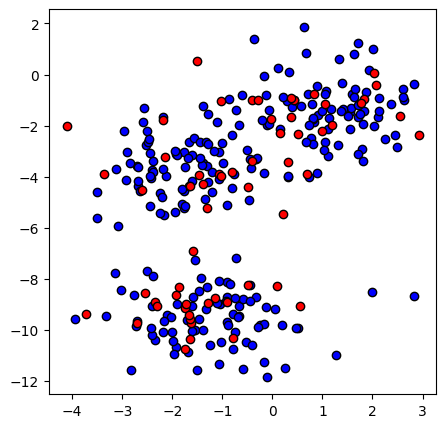

In [2]:
X, _ = make_blobs(n_samples = 300, n_features = 2, random_state=2)

# Train test splits
X_train , X_test = train_test_split(X, test_size=0.2, random_state=1)

_, ax = plt.subplots(figsize = (5,5))
ax.scatter(X_train[:,0], X_train[:,1], c='b', edgecolors='k')
ax.scatter(X_test[:,0], X_test[:,1], c='r', edgecolors='k')
plt.show()

In [ ]:
#Ojo verificar los valores de epsilon y min samples
#esto es mio
ejex = (3) - (-4)
ejey = (2) - (-2)
eje = min(ejex, ejey)
print(f'eps min = {}')


7

In [3]:
dbscan = DBSCAN(eps= 1.4 , min_samples= 4 )

# Train DBSCAN
predictions = dbscan.fit_predict(X_test)

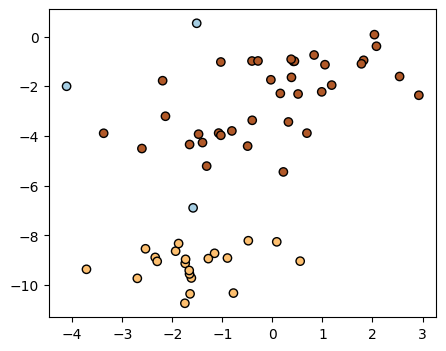

In [5]:
_, ax = plt.subplots(figsize = (5,4))

ax.scatter( X_test[:,0] , X_test[:,1] , c=predictions , edgecolors='k', cmap='Paired');

In [6]:
print(np.unique(predictions, return_counts=True))
#los clusters y la cantidad de puntos que pertenecen
#cuando el cluster es '-1' corresponde al outlier

(array([-1,  0,  1]), array([ 3, 21, 36]))


# **DBSCAN on real data**

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Machine learning/machine_learning/Sem_03/fruits_data_ext.csv')
data

,Unnamed: 0,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,0,1,apple,granny_smith,192.0,8.400000,7.300000,0.550000
1,1,1,apple,granny_smith,180.0,8.000000,6.800000,0.590000
2,2,1,apple,granny_smith,176.0,7.400000,7.200000,0.600000
3,3,2,mandarin,mandarin,86.0,6.200000,4.700000,0.800000
4,4,2,mandarin,mandarin,84.0,6.000000,4.600000,0.790000
...,...,...,...,...,...,...,...,...
172,54,4,lemon,unknown,119.0,6.322908,8.722908,0.721145
173,55,4,lemon,unknown,124.0,6.802490,8.202490,0.745125
174,56,4,lemon,unknown,145.0,7.829831,10.029831,0.826492
175,57,4,lemon,unknown,171.0,7.763532,9.763532,0.783177


In [4]:
X = data[['height','width']].values
X_train , X_test = train_test_split(X, test_size=0.2, random_state=1)

(141, 2)


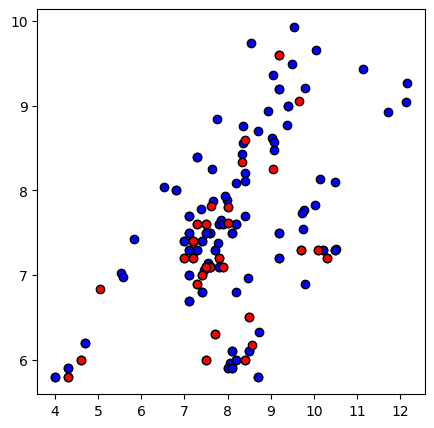

In [5]:
_, ax = plt.subplots(figsize = (5,5))
ax.scatter(X_train[:,0], X_train[:,1], c='b', edgecolors='k')
ax.scatter(X_test[:,0], X_test[:,1], c='r', edgecolors='k');
print (X_train.shape)

In [6]:
dbscan = DBSCAN(eps= 1 , min_samples= 3)
predictions = dbscan.fit_predict(X_test)

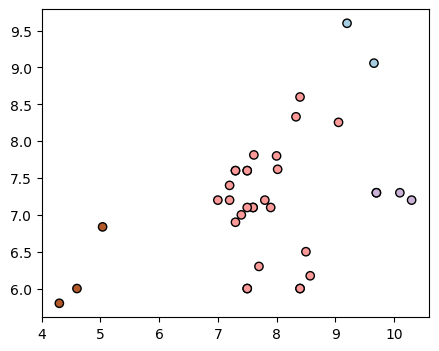

In [7]:
_, ax = plt.subplots(figsize = (5,4))
ax.scatter( X_test[:,0] , X_test[:,1] , c=predictions , edgecolors='k', cmap='Paired');

# **DBSCAN on images**

Use any of the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [image2.png](https://drive.google.com/file/d/1RxivIbgi2eAG6p1myuxQGJs2zhGEsH_4/view?usp=sharing)
 - [image3.jpg](https://drive.google.com/file/d/1Pc_C9B_vqIxkLFV90RWSlRxRcTN-yKqF/view?usp=sharing)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

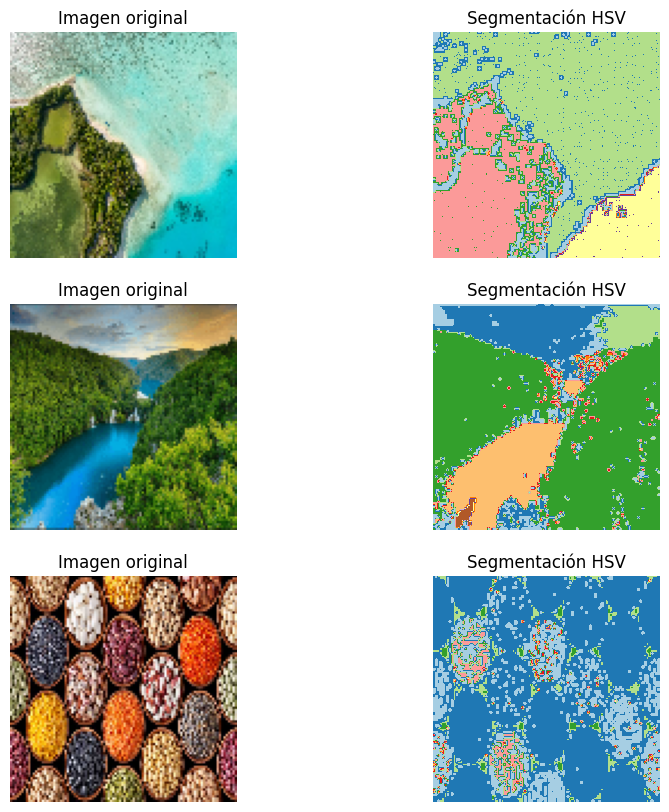

In [46]:
image_paths = ['/content/drive/MyDrive/Machine learning/machine_learning/Sem_06/image1.jpeg',
               '/content/drive/MyDrive/Machine learning/machine_learning/Sem_06/image2.png',
               '/content/drive/MyDrive/Machine learning/machine_learning/Sem_06/image3.jpg']

images = [cv2.imread(path) for path in image_paths]

size = (100, 100)

images_resized = [cv2.resize(img, size) for img in images]

_, axes = plt.subplots(len(images_resized), 2, figsize=(10, 10))

for i, img in enumerate(images_resized):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    vect_hsv = np.float32(hsv_img.reshape(-1, 3))

    # Parámetros para DBSCAN
    if i == 0:
        eps = 10
        min_samples = 15
    elif i == 1:
        eps = 10
        min_samples = 15
    else:
        eps = 10
        min_samples = 20

    dbscan_hsv = DBSCAN(eps=eps, min_samples=min_samples).fit(vect_hsv)

    clustered_hsv = dbscan_hsv.labels_.reshape(size)

    axes[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Imagen original")
    axes[i, 0].set_axis_off()

    axes[i, 1].imshow(clustered_hsv, cmap="Paired", vmin=-1, vmax=np.max(clustered_hsv))
    axes[i, 1].set_title("Segmentación HSV")
    axes[i, 1].set_axis_off();